# Simulating the motion of stock prices by Geometric Brownian Motion

In this project, I aim to simulate the stock prices of Apple Inc. using the Geometric Brownian Motion (GBM) model, a widely utilized framework in financial mathematics for modeling the dynamics of asset prices. The objective is to minimize the Mean Squared Error (MSE) between the simulated prices and historical data, ensuring that the model accurately reflects the behavior of Apple’s stock in real-world conditions. By optimizing the model's parameters, I wish to achieve a simulation that captures the trends and fluctuations in Apple’s stock price. This could also be utilized to enhance predictive accuracy for future price movements.

### Importing dependencies

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math
import yfinance as yf 
import pandas as pd
from scipy import stats
from scipy.stats import ks_2samp

## Downloading Comparison Data

Using the yahoo finance module to get the stock data for the company of interest. In this case, I am using the stock data for Apple from 2010.

In [28]:
#Define the ticker symbol and the start date
ticker = 'AAPL' 
start_date = '2010-01-01'

#Fetch the data using yfinance
AAPL_data = yf.download(ticker, start=start_date, interval='1wk')

#Save the data to a CSV file
csv_filename = 'AAPL_weekly_OHLC.csv' 
AAPL_data.to_csv(csv_filename)

[*********************100%***********************]  1 of 1 completed


In [29]:
#Read the data from the CSV file
apple = pd.read_csv('AAPL_weekly_OHLC.csv')
apple = apple.dropna()
apple = apple.reset_index(drop=True)
apple = apple.drop(columns=['Adj Close'])
apple.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-01,7.622500,7.699643,7.466071,7.520714,2124925600
1,2010-01-08,7.510714,7.607143,7.289286,7.479643,2543086000
2,2010-01-15,7.533214,7.698214,7.352500,7.431071,2544382400
3,2010-01-22,7.385000,7.632500,7.041429,7.117500,6710648000
4,2010-01-29,7.181429,7.221429,6.794643,6.858929,4067151200


In [30]:
#Creating the list of historical prices
historical_prices = apple['Close']

## Creating the Brownian Model with random parameters

#### Parameters

In [31]:
# Assigning values to the parameters based on the historical data
# mu and volatility are the randomly decided values

# drift rate
mu = 0.1

# historical data length
n = len(historical_prices)

# years to simulate
T = n/52

# number of simulations
M = 100

# initial stock price
S0 = apple['Close'][0]

# volatility
volatility = 0.3

#### Simulating the stock price using Geometric Brownian Motion 100 times

In [32]:
# number of time steps
dt = T/n

# simulate the stock price
St = np.exp((mu - 0.5 * volatility**2 / 2) * dt + volatility * np.random.normal(0,np.sqrt(dt),size=(M,n))).T

# calculate the stock price
St = S0 * np.cumprod(St,axis=0)

In [33]:
# create the time vector
time = np.linspace(0,T,n)
tt = np.full(shape=(M,n),fill_value=time).T

## Plot of the Brownian Motion over 100 simulations

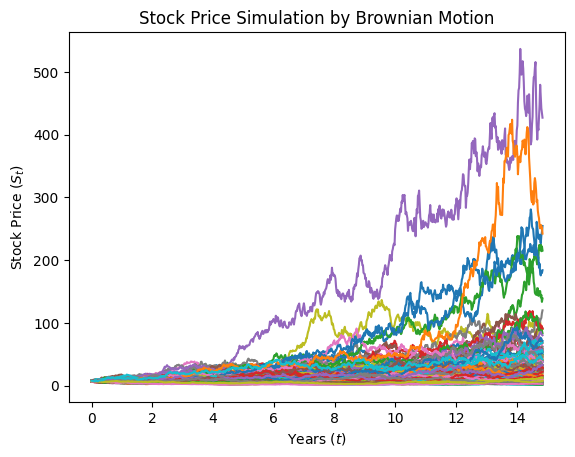

In [34]:
plt.plot(tt,St)
plt.xlabel('Years $(t)$')
plt.ylabel('Stock Price $(S_t)$')
plt.title('Stock Price Simulation by Brownian Motion')
plt.show()

## One time Brownian Comparison to Apple Stock

#### Recalculating the stock price for only one simulation

In [35]:
# Generate Brownian motion (random walk)
W = np.random.normal(0, np.sqrt(dt), n).cumsum()

# Simulated stock prices using the GBM formula
simulated_prices = S0 * np.exp((mu - 0.5 * volatility**2) * time + volatility * W)

#### Plotting the simulated stock prices with the historical prices

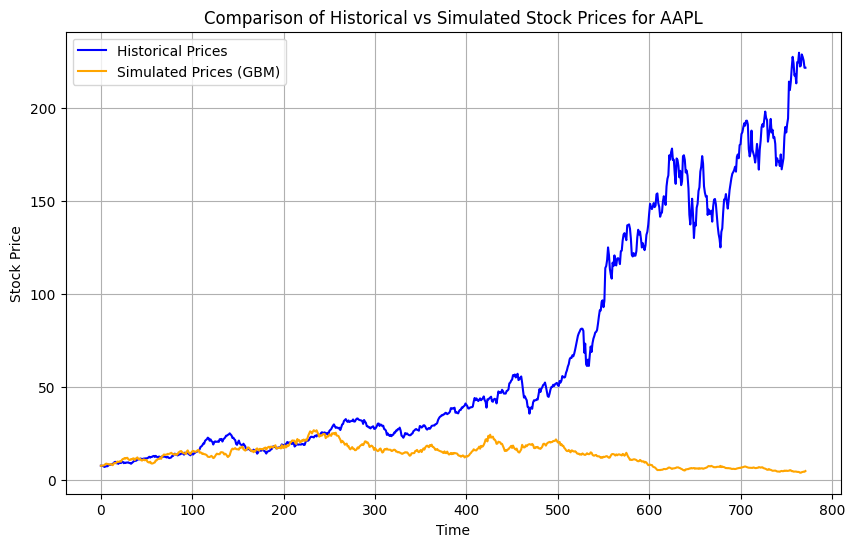

In [36]:
plt.figure(figsize=(10, 6))

# Plot historical stock prices
plt.plot(historical_prices.index, historical_prices.values, label="Historical Prices", color='blue')

# Plot simulated stock prices
plt.plot(historical_prices.index, simulated_prices, label="Simulated Prices (GBM)", color='orange')

plt.title(f"Comparison of Historical vs Simulated Stock Prices for {ticker}")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()

## Adjusted parameters

The drift term represents the average return of the stock per unit time, while the volatility term represents the standard deviation of the stock return per unit time. The drift and volatility are estimated from historical data, and the stock price is simulated using the Geometric Brownian Motion (GBM) formula. The simulated stock prices are compared to the historical prices to assess the accuracy of the model.

In [37]:
# Calculate historical log returns
log_returns = np.log(historical_prices / historical_prices.shift(1)).dropna()

# Calculate drift (mean return) and volatility (std deviation of returns)
historical_drift = log_returns.mean() * 52  # Annualized drift (since it's weekly data)
historical_volatility = log_returns.std() * np.sqrt(52)  # Annualized volatility

print(f"Historical Drift: {historical_drift:.4f}")
print(f"Historical Volatility: {historical_volatility:.4f}")

Historical Drift: 0.2282
Historical Volatility: 0.2615


In [38]:
# New, refined parameters

mu = historical_drift

n = len(historical_prices)

T = n/52

M = 100

S0 = apple['Close'][0]

volatility = historical_volatility

In [39]:
W = np.random.normal(0, np.sqrt(dt), n).cumsum()

simulated_prices = S0 * np.exp((mu - 0.5 * volatility**2) * time + volatility * W)

#### Plotting adjusted simulation

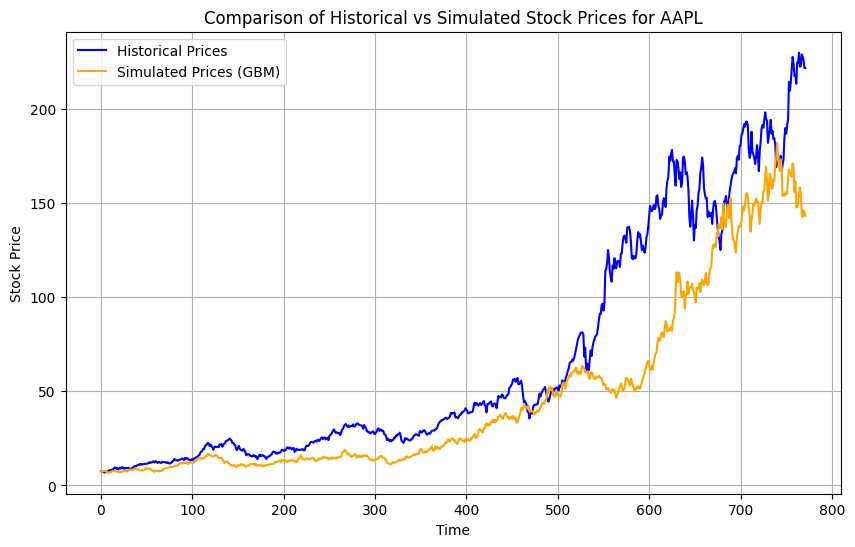

In [40]:
plt.figure(figsize=(10, 6))

# Plot historical stock prices
plt.plot(historical_prices.index, historical_prices.values, label="Historical Prices", color='blue')

# Plot simulated stock prices
plt.plot(historical_prices.index, simulated_prices, label="Simulated Prices (GBM)", color='orange')

plt.title(f"Comparison of Historical vs Simulated Stock Prices for {ticker}")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()

#### Checking normality of the returns

Common assumption that the return of a stock is normally distributed. We can test this assumption using plots and the Shapiro-Wilk test.

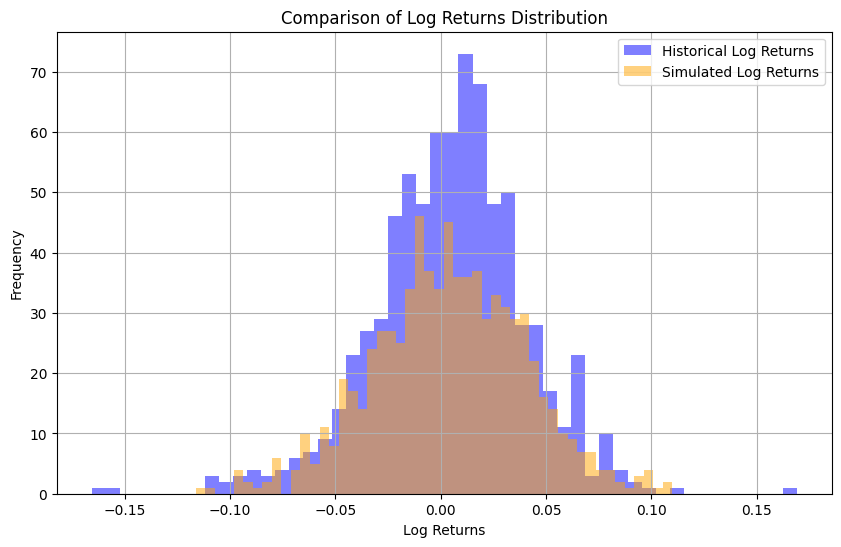

In [41]:
log_returns_historical = np.log(historical_prices / historical_prices.shift(1)).dropna()
log_returns_simulated = np.log(simulated_prices[1:] / simulated_prices[:-1])

# Plot histograms to compare the distribution of returns
plt.figure(figsize=(10, 6))
plt.hist(log_returns_historical, bins=50, alpha=0.5, label="Historical Log Returns", color="blue")
plt.hist(log_returns_simulated, bins=50, alpha=0.5, label="Simulated Log Returns", color="orange")
plt.legend()
plt.title("Comparison of Log Returns Distribution")
plt.xlabel("Log Returns")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [42]:
historical_mean_return = log_returns_historical.mean()
historical_volatility = log_returns_historical.std()

simulated_mean_return = log_returns_simulated.mean()
simulated_volatility = log_returns_simulated.std()

print(f"Historical Mean Return: {historical_mean_return:.4f}, Simulated Mean Return: {simulated_mean_return:.4f}")
print(f"Historical Volatility: {historical_volatility:.4f}, Simulated Volatility: {simulated_volatility:.4f}")

Historical Mean Return: 0.0044, Simulated Mean Return: 0.0038
Historical Volatility: 0.0363, Simulated Volatility: 0.0366


In [43]:
# Perform Shapiro-Wilk test for normality
shapiro_test_historical = stats.shapiro(log_returns_historical)
shapiro_test_simulated = stats.shapiro(log_returns_simulated)

print(f"Shapiro-Wilk Test (Historical Data): p-value = {shapiro_test_historical.pvalue:.4f}")
print(f"Shapiro-Wilk Test (Simulated Data): p-value = {shapiro_test_simulated.pvalue:.4f}")

Shapiro-Wilk Test (Historical Data): p-value = 0.0000
Shapiro-Wilk Test (Simulated Data): p-value = 0.5406


The shapiro-wilk test results show that the historical data (despite assumptions of normality) is not normally distributed. 

In [44]:
# Calculate correlation between historical and simulated log returns
correlation = np.corrcoef(log_returns_historical[:len(log_returns_simulated)], log_returns_simulated)[0, 1]

print(f"Correlation between Historical and Simulated Log Returns: {correlation:.4f}")

Correlation between Historical and Simulated Log Returns: 0.0695


Based on the correlation coefficient, the simulated log returns are not very closely correlated with the historical log returns. This suggests that the simulated data may not accurately capture the underlying dynamics of the historical data. Further analysis and refinement of the simulation model may be needed to improve the accuracy of the simulated data.

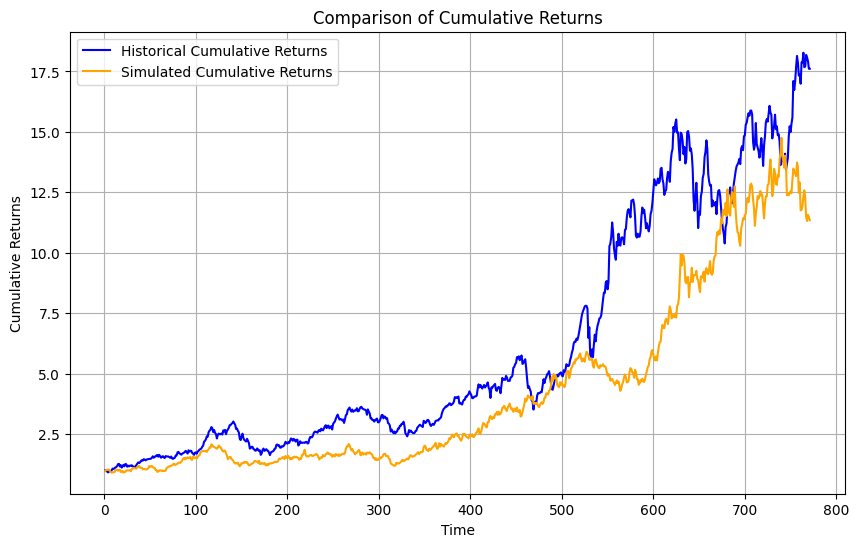

In [45]:
# Calculate cumulative returns for historical and simulated data
cumulative_returns_historical = (1 + log_returns_historical).cumprod()
cumulative_returns_simulated = (1 + log_returns_simulated).cumprod()

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns_historical.index, cumulative_returns_historical, label="Historical Cumulative Returns", color="blue")
plt.plot(cumulative_returns_historical.index, cumulative_returns_simulated, label="Simulated Cumulative Returns", color="orange")
plt.title("Comparison of Cumulative Returns")
plt.xlabel("Time")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(True)
plt.show()

In [46]:
# Perform KS test between historical and simulated log returns to test for similarity in distributions
ks_test = ks_2samp(log_returns_historical[:len(log_returns_simulated)], log_returns_simulated)

print(f"KS Test Statistic: {ks_test.statistic:.4f}, p-value: {ks_test.pvalue:.4f}")

KS Test Statistic: 0.0467, p-value: 0.3702


The KS resulted in a p value of 0.07, which is greater than 0.05, so we can't reject the null hypothesis that the two samples are drawn from the same distribution. This means that the simulated log returns are statistically similar to the historical log returns.

## Finding the parameters for the best fit

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.optimize import minimize

### Define the function to optimize

In [48]:
def objective_function(params, historical_prices, time):
    # Unpack the parameters
    mu, sigma = params

    # Simulate prices using these parameters
    S0 = historical_prices.iloc[0]
    T = len(historical_prices) / 52
    N = len(historical_prices)
    dt = T / N
    W = np.random.normal(0, np.sqrt(dt), N).cumsum()
    simulated_prices = S0 * np.exp((mu - 0.5 * sigma**2) * time + sigma * W)
    
    # Calculate the MSE between historical and simulated prices
    mse = mean_squared_error(historical_prices.values, simulated_prices)
    return mse

### Get the optimal parameters

In [49]:
# Initial parameter guesses (drift and volatility)
initial_params = [historical_mean_return, historical_volatility]

# Optimize using scipy's minimize function
result = minimize(objective_function, initial_params, args=(historical_prices, time), method='L-BFGS-B', bounds=[(-1, 1), (0, 1)])

# Optimized parameters
optimized_mu, optimized_sigma = result.x
print(f"Optimized Drift (mu): {optimized_mu:.4f}")
print(f"Optimized Volatility (sigma): {optimized_sigma:.4f}")


Optimized Drift (mu): 0.0044
Optimized Volatility (sigma): 0.0363


### Validation of the results

In [50]:
train_data = historical_prices.iloc[:600]  # Train on the first 600 weeks
test_data = historical_prices.iloc[600:]  # Test on the remaining weeks

# Calculate log returns for the training data
log_returns_train = np.log(train_data / train_data.shift(1)).dropna()

# Initial estimates for drift (mu) and volatility (sigma)
initial_mu = log_returns_train.mean() * 52  # Annualized drift
initial_sigma = log_returns_train.std() * np.sqrt(52)  # Annualized volatility
initial_params = [initial_mu, initial_sigma]

# Run optimization on train_data
result = minimize(objective_function, initial_params, args=(train_data, time[:600]), method='L-BFGS-B', bounds=[(-1, 1), (0, 1)])

# Use the optimized parameters to simulate stock prices over the test period
optimized_mu, optimized_sigma = result.x

In [51]:
def simulate_gbm(S0, mu, sigma, T, N):
    dt = T / N  # Time step
    W = np.random.normal(0, np.sqrt(dt), N).cumsum()  # Wiener process
    return S0 * np.exp((mu - 0.5 * sigma**2) * np.arange(N) * dt + sigma * W)

# Parameters for the validation model
S0_test = train_data.iloc[-1]  # Last price of the training set
N_test = len(test_data)  # Number of steps in the test period
T_test = N_test / 52  # Total time in years for test period

# Simulate prices for the test period
simulated_test_prices = simulate_gbm(S0_test, optimized_mu, optimized_sigma, T_test, N_test)

### Testing the new parameters on the test data

RMSE: 24.7612, MAE: 20.9040


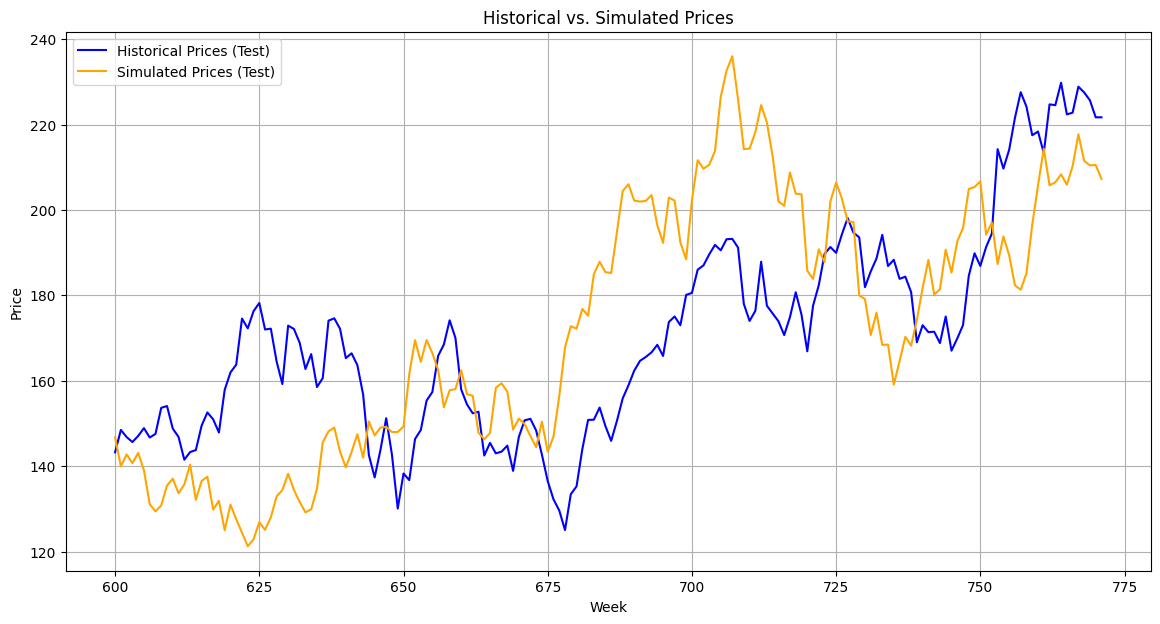

In [52]:
# Calculate error metrics
rmse = np.sqrt(mean_squared_error(test_data.values, simulated_test_prices))
mae = mean_absolute_error(test_data.values, simulated_test_prices)

print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(test_data.index, test_data.values, label="Historical Prices (Test)", color="blue")
plt.plot(test_data.index, simulated_test_prices, label="Simulated Prices (Test)", color="orange")
plt.title("Historical vs. Simulated Prices")
plt.xlabel("Week")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

I could not reach a sufficient result in simulating apple stock prices. The reason for this is that the dataset used is not large enough and the model is oversimplified. In the future, we need more data to simulate the stock prices, while implementing different methods to simulate the stock prices, such as Monte Carlo method. In the future, I will employ more complex models than GBM and use daily stock prices as data points to get better results. This approach will be included in my newstrading project.